In [13]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
# import API key
from config import weather_api_key

In [14]:
# starting URL for Weather Map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=77532dee00854e0fc96fbc64e9105900


In [15]:
#create set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [16]:
# Add latitudes and longitudes to a list 
coordinates = list(lat_lngs)

In [17]:
# Use the Citipy module to determine city based on lat and long 
from citipy import citipy

In [18]:
# use tuple fxn to display lat and long combos
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)
          

pontal do parana br
bathsheba bb
barentsburg sj
hilo us
lompoc us
port alfred za
nome us
mataura pf
hilo us
bredasdorp za
butaritari ki
muhos fi
hohhot cn
sept-iles ca
taolanaro mg
hermanus za
nakhon thai th
saskylakh ru
severo-kurilsk ru
puerto ayora ec
rikitea pf
new norfolk au
kindu cd
hobart au
ushuaia ar
kaohsiung tw
quatre cocos mu
avera pf
carnarvon au
taolanaro mg
yar-sale ru
lebu cl
puri in
vaini to
bredasdorp za
albany au
montanha br
los llanos de aridane es
namibe ao
mataura pf
hermanus za
bambous virieux mu
rikitea pf
clyde river ca
hofn is
jamestown sh
sapao ph
punta arenas cl
port alfred za
namibe ao
iqaluit ca
iraray ph
port alfred za
hilo us
atuona pf
kavaratti in
nanortalik gl
avarua ck
ulaanbaatar mn
halalo wf
bouna ci
ogaminana ng
punta arenas cl
maksatikha ru
la libertad sv
sao paulo de olivenca br
punta arenas cl
jamestown sh
bengkulu id
barrow us
hilo us
atuona pf
ushuaia ar
solnechnyy ru
arraial do cabo br
ponta do sol cv
taolanaro mg
busselton au
vila franca do 

guerrero negro mx
ilo pe
mahebourg mu
upernavik gl
puerto ayora ec
rocha uy
outlook ca
yellowknife ca
safaga eg
ribeira grande pt
hasaki jp
avarua ck
grand centre ca
geraldton au
kushiro jp
hobart au
ushuaia ar
tasiilaq gl
albany au
kodiak us
trelew ar
ushuaia ar
albany au
tiksi ru
tateyama jp
ponta do sol pt
longyearbyen sj
mataura pf
borgarnes is
butaritari ki
vaini to
port alfred za
hilo us
airai pw
qaanaaq gl
iralaya hn
rikitea pf
eureka us
paignton gb
nadym ru
tiksi ru
port-gentil ga
grindavik is
ushuaia ar
marcona pe
belushya guba ru
bud no
busselton au
new norfolk au
lolua tv
aitape pg
mezhdurechensk ru
rikitea pf
lompoc us
saldanha za
galiwinku au
busselton au
estelle us
thompson ca
attawapiskat ca
mar del plata ar
albany au
cortez us
karaul ru
bluff nz
lebu cl
bluff nz
punta arenas cl
albany au
punta arenas cl
haines junction ca
kinshasa cd
nouadhibou mr
sentyabrskiy ru
sabha jo
balaka mw
avera pf
barabinsk ru
ginir et
ewo cg
port alfred za
hithadhoo mv
bredasdorp za
shubarshi

In [19]:
# create a list for holding the cities
cities = []
# identify nearest city for each lat and long combo 
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#print the city to confirm sufficient count
len(cities)
    
    

629

In [20]:
import time
from datetime import datetime

In [21]:
# create empty list to hold weather data
city_data = []
# print the beginning of the logging
print("Beginning Data Retrieval     ")
print("------------------------")

# create counters
record_count = 1
set_count = 1

Beginning Data Retrieval     
------------------------


In [22]:
# List of city data
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list
for i, city in enumerate(cities):
   # Group cities in sets of 50 for logging purposes
   if (i % 50 == 0 and i >= 50):
       set_count += 1
       record_count = 1
   # Create endpoint URL with each city
   city_url = url + "&q=" + city.replace(" ", "+")
   # Log the url, record, and set numbers
   print(f"Processing Record {record_count} of Set {set_count} | {city}")
   # Add 1 to the record count
   record_count += 1
   # Run an API request for each of the cities
   try:
       # Parse the JSON and retrieve data
       city_weather = requests.get(city_url).json()
       # Parse out the max temp, humidity, and cloudiness
       city_lat = city_weather["coord"]["lat"]
       city_lng = city_weather["coord"]["lon"]
       city_max_temp = city_weather["main"]["temp_max"]
       city_humidity = city_weather["main"]["humidity"]
       city_clouds = city_weather["clouds"]["all"]
       city_wind = city_weather["wind"]["speed"]
       city_country = city_weather["sys"]["country"]
       city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
       # Append the City information into city_data list
       city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
   # If an error is experienced, skip the city
   except:
       print("City not found. Skipping...")
       pass
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pontal do parana
Processing Record 2 of Set 1 | bathsheba
Processing Record 3 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | lompoc
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | nome
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | muhos
Processing Record 12 of Set 1 | hohhot
Processing Record 13 of Set 1 | sept-iles
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | nakhon thai
Processing Record 17 of Set 1 | saskylakh
Processing Record 18 of Set 1 | severo-kurilsk
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | new norfolk
Processing 

Processing Record 40 of Set 4 | cayenne
Processing Record 41 of Set 4 | tamiahua
Processing Record 42 of Set 4 | ostrovnoy
Processing Record 43 of Set 4 | tuktoyaktuk
Processing Record 44 of Set 4 | jiddah
City not found. Skipping...
Processing Record 45 of Set 4 | rundu
Processing Record 46 of Set 4 | belfast
Processing Record 47 of Set 4 | glendive
Processing Record 48 of Set 4 | rodrigues alves
Processing Record 49 of Set 4 | truth or consequences
Processing Record 50 of Set 4 | paracuru
Processing Record 1 of Set 5 | wittmund
Processing Record 2 of Set 5 | miyako
Processing Record 3 of Set 5 | inongo
Processing Record 4 of Set 5 | nikolskoye
Processing Record 5 of Set 5 | tarudant
City not found. Skipping...
Processing Record 6 of Set 5 | toamasina
Processing Record 7 of Set 5 | ashland
Processing Record 8 of Set 5 | wanning
Processing Record 9 of Set 5 | mareeba
Processing Record 10 of Set 5 | armacao dos buzios
City not found. Skipping...
Processing Record 11 of Set 5 | hirara
Pr

Processing Record 28 of Set 8 | outlook
Processing Record 29 of Set 8 | safaga
Processing Record 30 of Set 8 | grand centre
City not found. Skipping...
Processing Record 31 of Set 8 | trelew
Processing Record 32 of Set 8 | tateyama
Processing Record 33 of Set 8 | longyearbyen
Processing Record 34 of Set 8 | borgarnes
Processing Record 35 of Set 8 | airai
Processing Record 36 of Set 8 | iralaya
Processing Record 37 of Set 8 | eureka
Processing Record 38 of Set 8 | paignton
Processing Record 39 of Set 8 | nadym
Processing Record 40 of Set 8 | port-gentil
Processing Record 41 of Set 8 | marcona
City not found. Skipping...
Processing Record 42 of Set 8 | bud
Processing Record 43 of Set 8 | lolua
City not found. Skipping...
Processing Record 44 of Set 8 | aitape
Processing Record 45 of Set 8 | mezhdurechensk
Processing Record 46 of Set 8 | saldanha
Processing Record 47 of Set 8 | galiwinku
City not found. Skipping...
Processing Record 48 of Set 8 | estelle
Processing Record 49 of Set 8 | co

City not found. Skipping...
Processing Record 13 of Set 12 | chagda
City not found. Skipping...
Processing Record 14 of Set 12 | pangnirtung
Processing Record 15 of Set 12 | provideniya
Processing Record 16 of Set 12 | carutapera
Processing Record 17 of Set 12 | teknaf
Processing Record 18 of Set 12 | knysna
Processing Record 19 of Set 12 | bocana de paiwas
Processing Record 20 of Set 12 | tikapur
Processing Record 21 of Set 12 | carbonia
Processing Record 22 of Set 12 | guangyuan
Processing Record 23 of Set 12 | dudinka
Processing Record 24 of Set 12 | sechura
Processing Record 25 of Set 12 | toliary
City not found. Skipping...
Processing Record 26 of Set 12 | nioro
Processing Record 27 of Set 12 | klyuchi
Processing Record 28 of Set 12 | roebourne
Processing Record 29 of Set 12 | evanston
Processing Record 30 of Set 12 | somerset
Processing Record 31 of Set 12 | tadine
Processing Record 32 of Set 12 | opuwo
Processing Record 33 of Set 12 | gornopravdinsk
Processing Record 34 of Set 1

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pontal Do Parana,-25.6533,-48.5128,89.26,61,5,8.12,BR,2021-11-27 18:21:03
1,Bathsheba,13.2167,-59.5167,86.61,74,40,11.50,BB,2021-11-27 18:21:03
2,Hilo,19.7297,-155.0900,69.53,60,75,5.75,US,2021-11-27 18:21:04
3,Lompoc,34.6391,-120.4579,68.72,19,1,5.75,US,2021-11-27 18:21:04
4,Port Alfred,-33.5906,26.8910,66.56,93,47,14.43,ZA,2021-11-27 18:21:05
...,...,...,...,...,...,...,...,...,...
568,Henderson,36.0397,-114.9819,64.74,9,1,0.00,US,2021-11-27 18:20:53
569,Kununurra,-15.7667,128.7333,78.78,78,47,0.00,AU,2021-11-27 18:24:17
570,Itarema,-2.9248,-39.9167,87.06,58,57,14.83,BR,2021-11-27 18:25:42
571,Kolda,12.8833,-14.9500,91.71,46,0,4.61,SN,2021-11-27 18:25:43


In [24]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df



,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pontal Do Parana,BR,2021-11-27 18:21:03,-25.6533,-48.5128,89.26,61,5,8.12
1,Bathsheba,BB,2021-11-27 18:21:03,13.2167,-59.5167,86.61,74,40,11.50
2,Hilo,US,2021-11-27 18:21:04,19.7297,-155.0900,69.53,60,75,5.75
3,Lompoc,US,2021-11-27 18:21:04,34.6391,-120.4579,68.72,19,1,5.75
4,Port Alfred,ZA,2021-11-27 18:21:05,-33.5906,26.8910,66.56,93,47,14.43
...,...,...,...,...,...,...,...,...,...
568,Henderson,US,2021-11-27 18:20:53,36.0397,-114.9819,64.74,9,1,0.00
569,Kununurra,AU,2021-11-27 18:24:17,-15.7667,128.7333,78.78,78,47,0.00
570,Itarema,BR,2021-11-27 18:25:42,-2.9248,-39.9167,87.06,58,57,14.83
571,Kolda,SN,2021-11-27 18:25:43,12.8833,-14.9500,91.71,46,0,4.61


In [59]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [60]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


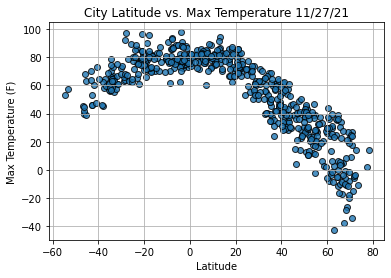

In [27]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


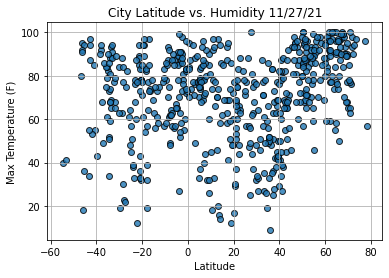

In [28]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

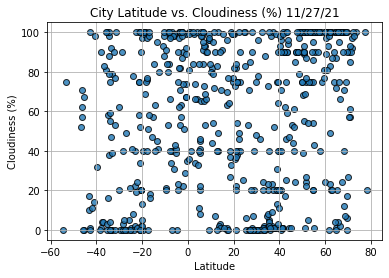

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


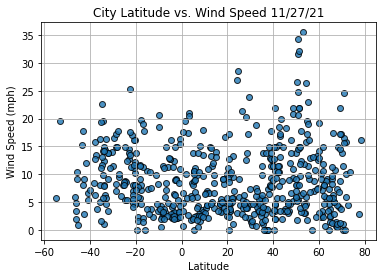

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [31]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [32]:
index13 = city_data_df.loc[13]
index13

City                  Nakhon Thai
Country                        TH
Date          2021-11-27 18:21:09
Lat                       17.1006
Lng                      100.8374
Max Temp                    66.88
Humidity                       87
Cloudiness                     63
Wind Speed                   3.44
Name: 13, dtype: object

In [33]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4      False
       ...  
568     True
569    False
570    False
571     True
572     True
Name: Lat, Length: 573, dtype: bool

In [34]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


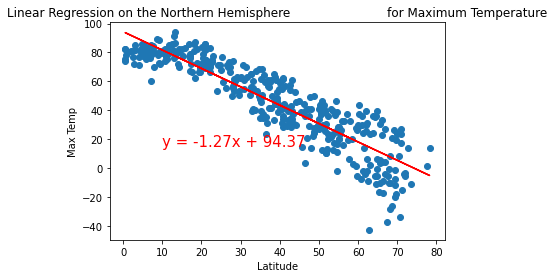

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,15))


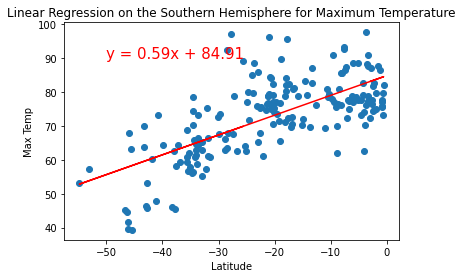

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       "Linear Regression on the Southern Hemisphere for Maximum Temperature", "Max Temp",(-50,90))

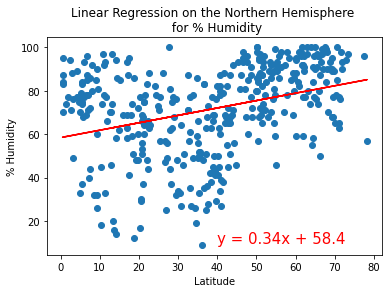

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))


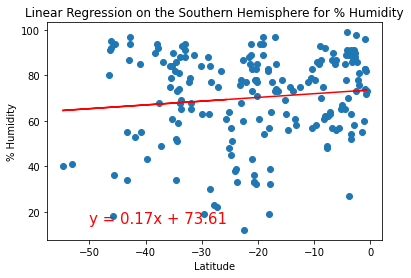

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))


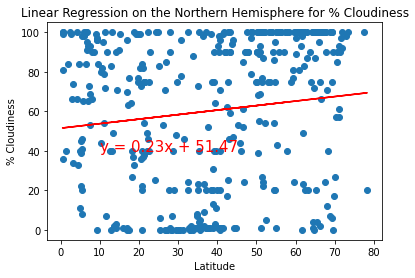

In [39]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10,40))


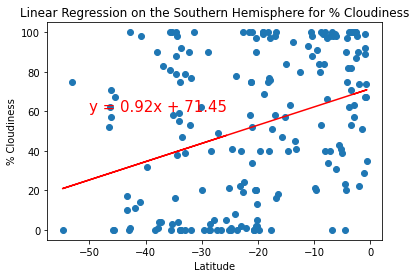

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))


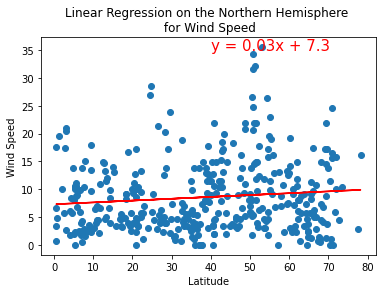

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))


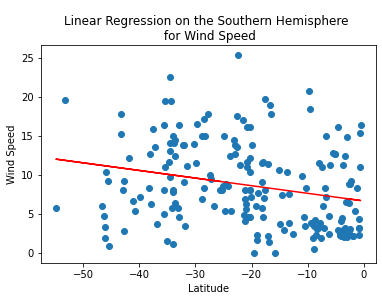

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,30))


In [43]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

In [44]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()


,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Pontal Do Parana,BR,2021-11-27 18:21:03,-25.6533,-48.5128,89.26,61,5,8.12
1,1,Bathsheba,BB,2021-11-27 18:21:03,13.2167,-59.5167,86.61,74,40,11.50
2,2,Hilo,US,2021-11-27 18:21:04,19.7297,-155.0900,69.53,60,75,5.75
3,3,Lompoc,US,2021-11-27 18:21:04,34.6391,-120.4579,68.72,19,1,5.75
4,4,Port Alfred,ZA,2021-11-27 18:21:05,-33.5906,26.8910,66.56,93,47,14.43
